In [1]:
%matplotlib notebook

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
data_file = "correct_output.csv"

In [3]:
#Load general data
data_file_pd = pd.read_csv(data_file)
data_file_pd.head()


,School Name,School ID,School Type,School Size,10 Year Median Earnings,10 Year Mean Earnings,Lat,Lng,City,State,SAT Scores,ACT Scores,Admission Rate,Average Gross Cost,Average Net Price,Locale
0,University of California-Merced,445188,Public,7375.0,NaN,NaN,37.366237,-120.424944,Merced,CA,1114.0,24.0,0.6979,34330.0,13223.0,41.0
1,University of Southern California,123961,Private,18942.0,74000.0,88800.0,34.021281,-118.284169,Los Angeles,CA,1437.0,32.0,0.1595,69547.0,30232.0,11.0
2,West Los Angeles College,125471,Public,9622.0,31500.0,37300.0,34.004512,-118.386664,Culver City,CA,NaN,NaN,NaN,13255.0,6823.0,21.0
3,Pueblo Community College,127884,Public,3641.0,27700.0,31900.0,38.262124,-104.636258,Pueblo,CO,NaN,NaN,NaN,20783.0,14860.0,12.0
4,University of Colorado Boulder,126614,Public,28565.0,50800.0,59700.0,40.008781,-105.270823,Boulder,CO,1293.0,28.0,0.7984,29215.0,20706.0,12.0


In [4]:
#Spurce specific data
new_data_file_pd = data_file_pd[["School Name", "State","Average Net Price", "10 Year Mean Earnings"]]
new_data_file_pd = new_data_file_pd.set_index("School Name")
new_data_file_pd.head()

,State,Average Net Price,10 Year Mean Earnings
School Name,,,
University of California-Merced,CA,13223.0,NaN
University of Southern California,CA,30232.0,88800.0
West Los Angeles College,CA,6823.0,37300.0
Pueblo Community College,CO,14860.0,31900.0
University of Colorado Boulder,CO,20706.0,59700.0


In [5]:
#Clean a new data
new_data = data_file_pd[["School Name", "State","10 Year Median Earnings", "10 Year Mean Earnings",
                         "Average Net Price"]].head()
new_data.head()

,School Name,State,10 Year Median Earnings,10 Year Mean Earnings,Average Net Price
0,University of California-Merced,CA,NaN,NaN,13223.0
1,University of Southern California,CA,74000.0,88800.0,30232.0
2,West Los Angeles College,CA,31500.0,37300.0,6823.0
3,Pueblo Community College,CO,27700.0,31900.0,14860.0
4,University of Colorado Boulder,CO,50800.0,59700.0,20706.0


In [6]:
#Find out the empy spots of the data
data_file_pd.count()

School Name                1006
School ID                  1006
School Type                1006
School Size                1006
10 Year Median Earnings     978
10 Year Mean Earnings       978
Lat                        1006
Lng                        1006
City                       1006
State                      1006
SAT Scores                  725
ACT Scores                  705
Admission Rate              839
Average Gross Cost          994
Average Net Price           999
Locale                     1006
dtype: int64

In [7]:
#Clean the data
clean_data_file_pd = data_file_pd.dropna(how="any")
clean_data_file_pd.count()

School Name                695
School ID                  695
School Type                695
School Size                695
10 Year Median Earnings    695
10 Year Mean Earnings      695
Lat                        695
Lng                        695
City                       695
State                      695
SAT Scores                 695
ACT Scores                 695
Admission Rate             695
Average Gross Cost         695
Average Net Price          695
Locale                     695
dtype: int64

In [8]:
#select specif data
clean_new_data_pd = clean_data_file_pd[["School Name", "State","10 Year Median Earnings",
                                        "10 Year Mean Earnings","Average Gross Cost","Average Net Price"]]

clean_new_data_pd

,School Name,State,10 Year Median Earnings,10 Year Mean Earnings,Average Gross Cost,Average Net Price
1,University of Southern California,CA,74000.0,88800.0,69547.0,30232.0
4,University of Colorado Boulder,CO,50800.0,59700.0,29215.0,20706.0
9,Yale University,CT,83200.0,124400.0,68950.0,18627.0
11,Central Connecticut State University,CT,47900.0,51600.0,22576.0,17889.0
12,Barry University,FL,45800.0,50900.0,43787.0,20254.0
...,...,...,...,...,...,...
997,Lander University,SC,34200.0,38100.0,23092.0,14508.0
998,College of Charleston,SC,40700.0,48700.0,28426.0,19311.0
999,University of California-Irvine,CA,58400.0,65800.0,31976.0,13376.0
1000,University of California-San Diego,CA,59900.0,69600.0,31794.0,14630.0


In [9]:
avg_cross = clean_new_data_pd[["School Name", "Average Gross Cost"]]
avg_cross

,School Name,Average Gross Cost
1,University of Southern California,69547.0
4,University of Colorado Boulder,29215.0
9,Yale University,68950.0
11,Central Connecticut State University,22576.0
12,Barry University,43787.0
...,...,...
997,Lander University,23092.0
998,College of Charleston,28426.0
999,University of California-Irvine,31976.0
1000,University of California-San Diego,31794.0


<IPython.core.display.Javascript object>


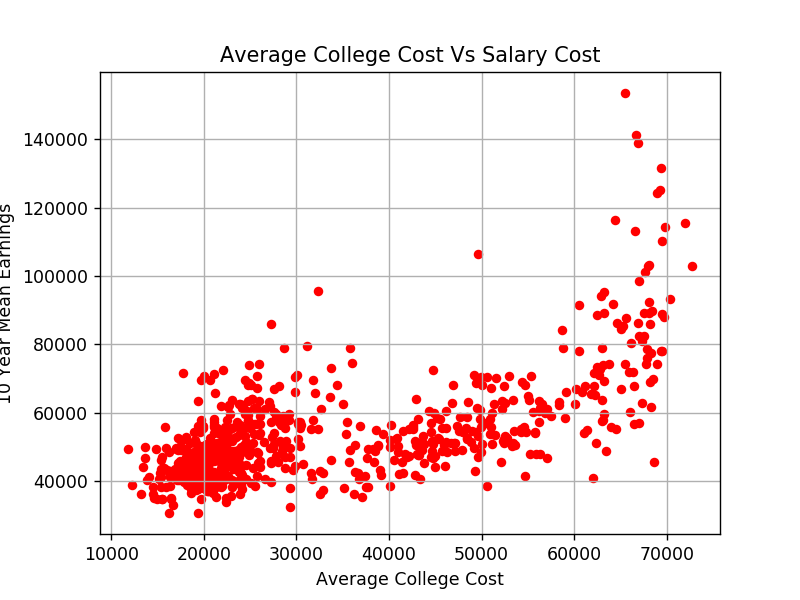

In [11]:
#Plot the chart
clean_new_data_pd.plot.scatter(x = "Average Gross Cost",
                               y = "10 Year Mean Earnings", 
                               c = "Red")

plt.title("Average College Cost Vs Salary Cost")
plt.ylabel("10 Year Mean Earnings")
plt.xlabel("Average College Cost")
plt.savefig("Graphs_and_Charts/average_cost.png", bbox_inches="tight")
plt.grid(True)
                    